In [42]:
import sqlite3
import pandas as pd
import numpy as np

In [10]:
conn = sqlite3.connect("database.sqlite")

In [44]:
df = pd.read_sql_query("select * from loan;",conn)

In [45]:
original_df = df

In [49]:
df = df.loc[pd.notna(df['member_id']),:]
df['id'] = pd.Categorical(df['id'])
df['member_id'] = pd.Categorical(df['member_id'])
df['term'] = pd.Categorical(df['term'])
df['int_rate'] = df['int_rate'].str[:-1].astype(float)
df['grade'] = pd.Categorical(df['grade'])
df['sub_grade'] = pd.Categorical(df['sub_grade'])
df['emp_length'] = pd.Categorical(df['emp_length'])
df['home_ownership'] = pd.Categorical(df['home_ownership'])
df['verification_status'] = pd.Categorical(df['verification_status'])
df['loan_status'] = pd.Categorical(df['loan_status'])
df['pymnt_plan'] = pd.Categorical(df['pymnt_plan'])
df['purpose'] = pd.Categorical(df['purpose'])
df['zip_code'] = pd.Categorical(df['zip_code'])
df['addr_state'] = pd.Categorical(df['addr_state'])
df['initial_list_status'] = pd.Categorical(df['initial_list_status'])
df['application_type'] = pd.Categorical(df['application_type'])
df['id'] = pd.Categorical(df['id'])
df['id'] = pd.Categorical(df['id'])
df['id'] = pd.Categorical(df['id'])
df['id'] = pd.Categorical(df['id'])
df.head()

,index,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887382 entries, 0 to 887382
Data columns (total 75 columns):
index                          887382 non-null int64
id                             887382 non-null category
member_id                      887382 non-null category
loan_amnt                      887382 non-null float64
funded_amnt                    887382 non-null float64
funded_amnt_inv                887382 non-null float64
term                           887382 non-null category
int_rate                       887382 non-null float64
installment                    887382 non-null float64
grade                          887382 non-null category
sub_grade                      887382 non-null category
emp_title                      835925 non-null object
emp_length                     887382 non-null category
home_ownership                 887382 non-null category
annual_inc                     887378 non-null float64
verification_status            887382 non-null category
issu

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

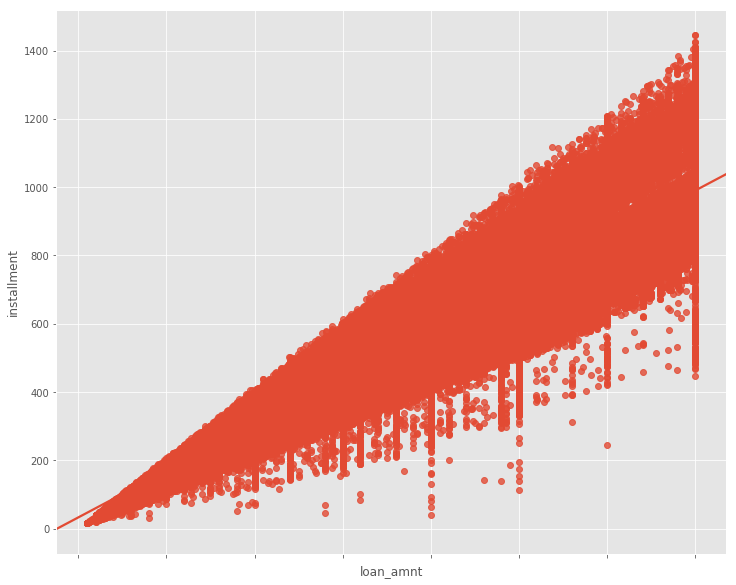

In [18]:
plt.style.use('ggplot')
plt.figure(figsize=(12,10))
g = sns.regplot(x='loan_amnt',y='installment',data=df,x_jitter=1)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

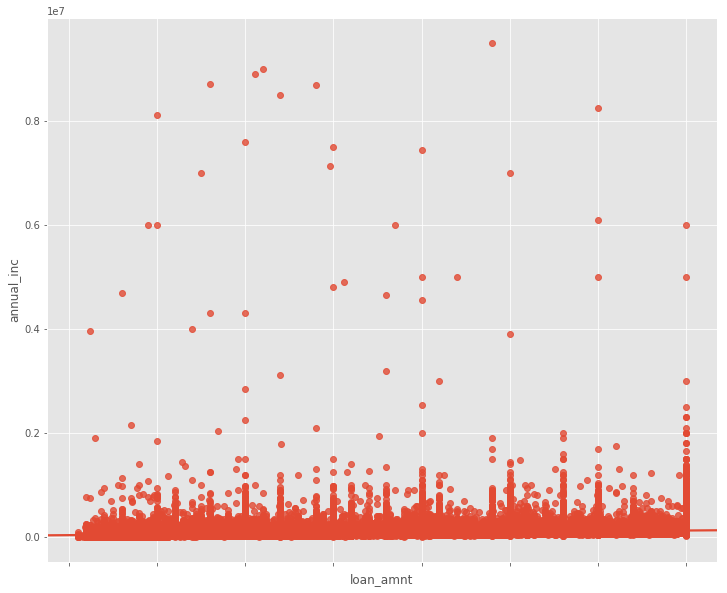

In [19]:
plt.style.use('ggplot')
plt.figure(figsize=(12,10))
g = sns.regplot(x='loan_amnt',y='annual_inc',data=df,x_jitter=1)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

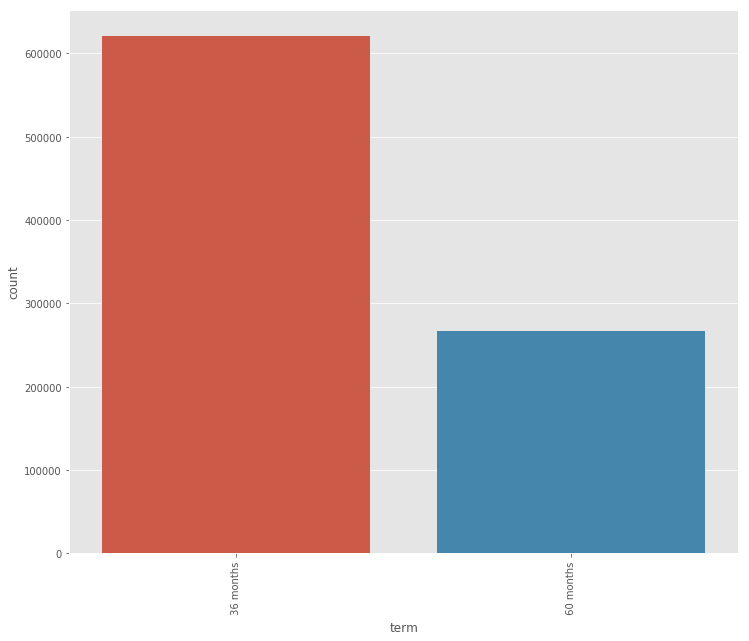

In [21]:
plt.style.use('ggplot')
plt.figure(figsize=(12,10))
p = sns.countplot(x='term',data=df)
p.set_xticklabels(p.get_xticklabels(),rotation=90)
plt.show()

Values describe: 
grade                                                    A       B       C  \
loan_status                                                                  
Charged Off                                           2617    9519   12642   
Current                                             103323  171735  171175   
Default                                                 47     198     360   
Does not meet the credit policy. Status:Charged...       8      85     148   
Does not meet the credit policy. Status:Fully Paid      90     269     481   
Fully Paid                                           39679   66546   52678   
In Grace Period                                        365    1240    1887   
Issued                                                1448    2529    2472   
Late (16-30 days)                                      134     410     678   
Late (31-120 days)                                     492    2004    3339   

grade                                        

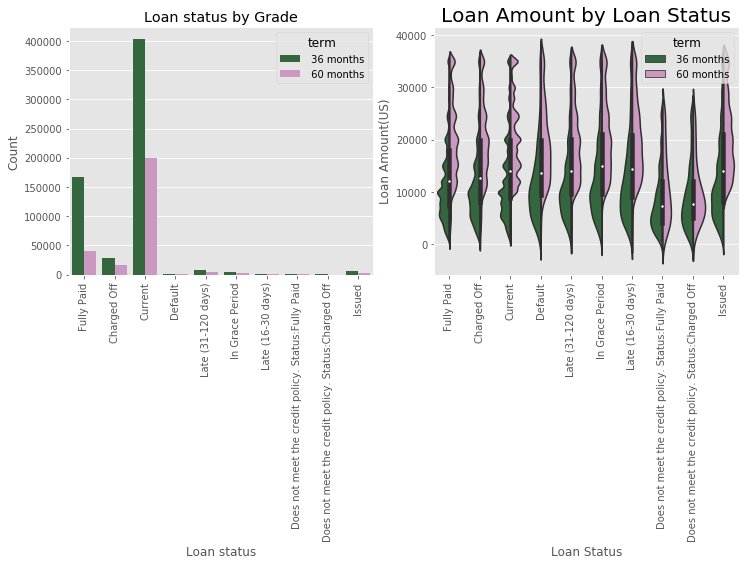

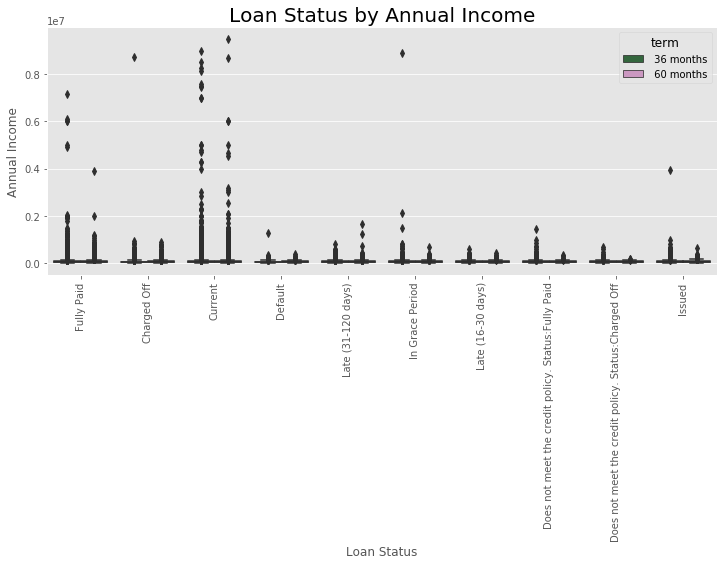

In [26]:
print("Values describe: ")
print(pd.crosstab(df.loan_status, df.grade))
plt.style.use('ggplot')
plt.figure(figsize=(12,10))
g=plt.subplot(221)
g = sns.countplot(x='loan_status',data=df,hue='term',palette='cubehelix')
g.set_xlabel('Loan status',fontsize=12)
g.set_ylabel('Count',fontsize=12)
g.set_title('Loan status by Grade')
g.set_xticklabels(g.get_xticklabels(),rotation=90)

g1 = plt.subplot(222)
g1 = sns.violinplot(x='loan_status',y='loan_amnt',data=df,palette='cubehelix',hue='term',split=True)
g1.set_xlabel("Loan Status", fontsize=12)
g1.set_ylabel("Loan Amount(US)", fontsize=12)
g1.set_title("Loan Amount by Loan Status", fontsize=20)
g1.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.show()
plt.figure(figsize=(12,10))
g2 = plt.subplot(212)
g2 = sns.boxplot(x="loan_status",y="annual_inc", data=df,hue='term',palette="cubehelix")
g2.set_xlabel("Loan Status", fontsize=12)
g2.set_ylabel("Annual Income", fontsize=12)
g2.set_title("Loan Status by Annual Income", fontsize=20)
g2.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

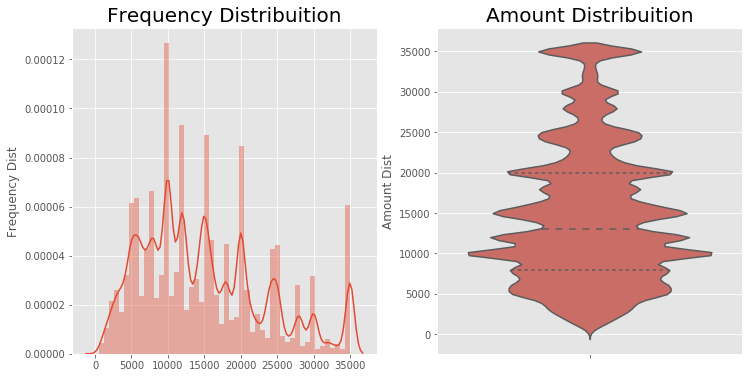

In [35]:
#I will start looking the loan_amnt column
plt.figure(figsize=(12,6))

plt.subplot(121)
g = sns.distplot(df["loan_amnt"])
g.set_xlabel("", fontsize=12)
g.set_ylabel("Frequency Dist", fontsize=12)
g.set_title("Frequency Distribuition", fontsize=20)

plt.subplot(122)
g1 = sns.violinplot(y="loan_amnt", data=df, 
               inner="quartile", palette="hls")
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Amount Dist", fontsize=12)
g1.set_title("Amount Distribuition", fontsize=20)

plt.show()

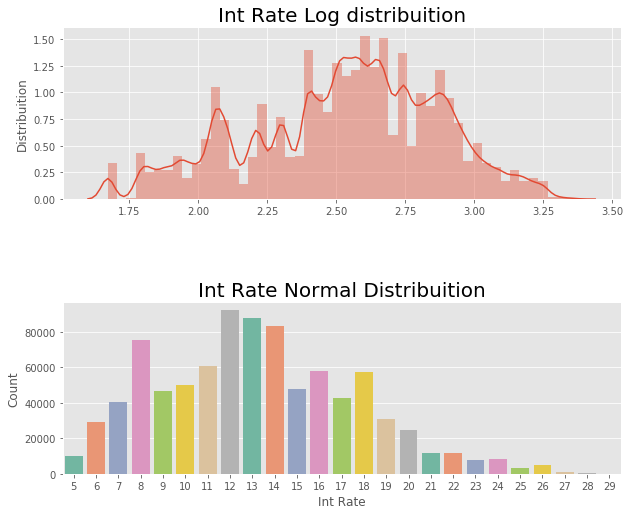

In [51]:
df['int_round'] = df['int_rate'].round(0).astype(int)

plt.figure(figsize = (10,8))

#Exploring the Int_rate
plt.subplot(211)
g = sns.distplot(np.log(df["int_rate"]))
g.set_xlabel("", fontsize=12)
g.set_ylabel("Distribuition", fontsize=12)
g.set_title("Int Rate Log distribuition", fontsize=20)

plt.subplot(212)
g1 = sns.countplot(x="int_round",data=df, 
                   palette="Set2")
g1.set_xlabel("Int Rate", fontsize=12)
g1.set_ylabel("Count", fontsize=12)
g1.set_title("Int Rate Normal Distribuition", fontsize=20)

plt.subplots_adjust(wspace = 0.2, hspace = 0.6,top = 0.9)

plt.show()